# Linear Regression

## Agenda

- What is **linear regression**, and how does it work?
- How do I **train and interpret** a linear regression model in scikit-learn?
- What are some **evaluation metrics** for regression problems?
- How do I choose **which features to include** in my model?
- How to reduce overfitting in our model?

In [18]:
# conventional way to import pandas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales,Area
1,230.1,37.8,69.2,22.1,rural
2,44.5,39.3,45.1,10.4,urban
3,17.2,45.9,69.3,9.3,rural
4,151.5,41.3,58.5,18.5,urban
5,180.8,10.8,58.4,12.9,suburban


In [19]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

C:\Users\sanyam.oberoi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


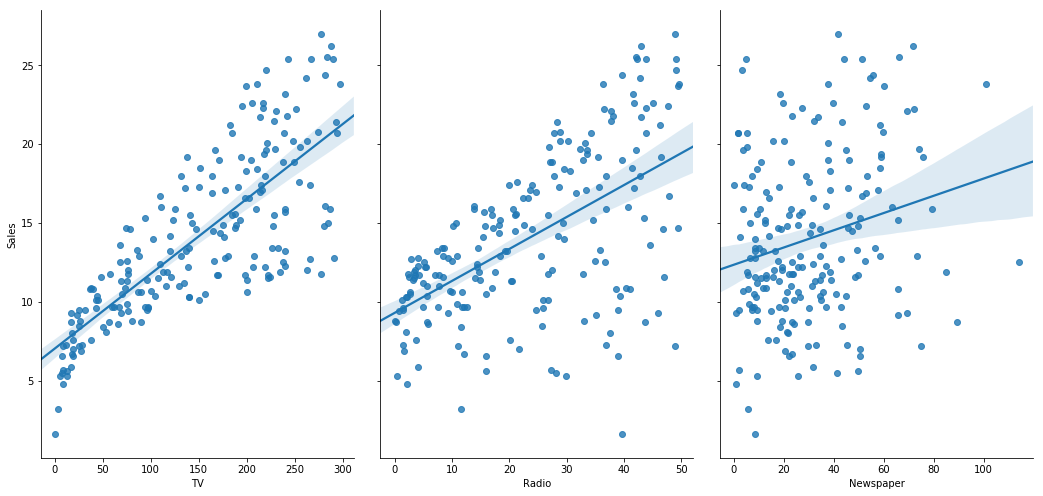

In [4]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Linear regression

**Pros:** fast, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [20]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
# X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [21]:
# select a Series from the DataFrame
y = data['Sales']

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

## Checking Multicollinearity

In [22]:
X.corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


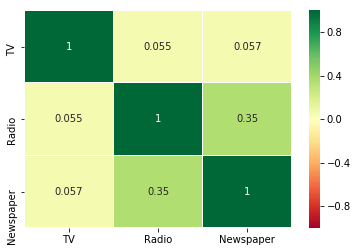

In [23]:
# Plotting a heat map of variable correlations
# Any correlation higher than 0.8 (or lower than -0.8) could be indicative of multicollinearity (makes interpretation of coefficients difficult)
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn',linewidths=0.2, vmin=-1,vmax=1)

In [9]:
# Variance Inflation Factor -> metric to check multicollinearity (any value greater than 5 indicative of multicollinearity)
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

Y_check, X_check = dmatrices('Sales ~ TV+Radio+Newspaper', data, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_check.values, i) for i in range(X_check.shape[1])]
vif["features"] = X_check.columns
vif

,VIF Factor,features
0,6.848900,Intercept
1,1.004611,TV
2,1.144952,Radio
3,1.145187,Newspaper


## Splitting X and y into training and testing sets

In [18]:
#!pip install sklearn.model_selection

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [16]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Linear regression in scikit-learn

In [17]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Interpreting model coefficients

In [53]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [54]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.003450464711180378)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Making predictions

In [55]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **some common evaluation metrics** for regression problems:

In [56]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [57]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [58]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [59]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our Sales predictions

In [60]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


### Computing the R-square for our Sales predictions

In [61]:
# R-square indicates the variance in the dependent variable that is being captured by the independent variables
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9156213613792232


## Categorical Independent variables

In [62]:
# we need (k-1) dummy variables for k class variable
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


In [63]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,rural,0,0
2,44.5,39.3,45.1,10.4,urban,0,1
3,17.2,45.9,69.3,9.3,rural,0,0
4,151.5,41.3,58.5,18.5,urban,0,1
5,180.8,10.8,58.4,12.9,suburban,1,0


In [80]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

# fit the model to the training data (learn the coefficients)
lm2.fit(X_train, y_train)

# print the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.046475450953131804),
 ('Radio', 0.1785302804644443),
 ('Newspaper', 0.0036377258782662996),
 ('Area_suburban', -0.07807127832337721),
 ('Area_urban', 0.3129402934217748)]

In [81]:
# make predictions on the testing set
y_pred = lm2.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3989110441173702


## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [87]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# instantiate and fit
lm3 = LinearRegression()

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

# fit the model to the training data (learn the coefficients)
lm3.fit(X_train, y_train)

# make predictions on the testing set
y_pred = lm3.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

### Recursive Feature Elimination

In [88]:
from sklearn.feature_selection import RFECV

feature_cols = ['TV', 'Radio', 'Newspaper', 'Area_suburban', 'Area_urban']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# instantiate
linreg = LinearRegression()

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

selector = RFECV(estimator = linreg, step=1, cv=5)
selector = selector.fit(X_train, y_train)

In [89]:
selector.support_

array([ True,  True, False,  True,  True])

In [91]:
print(np.sqrt(metrics.mean_squared_error(y_test, selector.predict(X_test))))

1.3809282465139863


## K-fold Cross-Validation

In [92]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation

feature_cols = ['TV', 'Radio', 'Newspaper', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

kfold = KFold(n_splits=5, random_state=1) # k=10, split the data into 10 equal parts
lm_cv = LinearRegression()

cv_result = cross_val_score(lm_cv, X, y, cv = kfold, scoring = 'neg_mean_squared_error')

print(np.sqrt(-cv_result.mean()))

1.7617677542348762


## Regularization (Bias - Variance trade-off)

### Overfitting and Underfitting

Regularized models are meant to avoid Overfitting. But push them too far and you'll end up with Underfitting.<br>

Overfitting means that your regression will probably fit well to the data you are working on, but as soon as you bring in yet unseen values, your prediction will lose accuracy. Indeed, if the dataset contains too many outliers, an overfitted regression line will try to be the closest possible to these points though they are a not a good representation of the dataset.The regression will then not be able to predict new points that <i>do</i> represent the dataset. <br>
<i> If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. </i><br>

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/05210948/overunder1.png"/>

Some variables will tend to overfit more than others.<br>
This is where Regularization comes in and helps improve accuracy in two ways : 
- It considers each variable and is able to lower the coefficients of variables that overfit
- It prevents from multicollinearity by lowering influence of variables already "represented" by others (when variables are highly correlated)

On the other hand, if regularization is too severe, we'll be in a situation of Underfitting, meaning that the Regression Line will be too "generalized".

There are different regularized models out there, main ones are : **Ridge, Lasso and Elastic-Net**.<br>
Lasso and Elastic-Net have the capacity to bring coefficients down to exactly 0 and hence, can be used for variable selection.

In [93]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper', 'Area_suburban', 'Area_urban']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

#TRAINING MODELS
linear_model = LinearRegression().fit(X_train, y_train)
ridge_model = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 200], cv = 10, normalize=True).fit(X_train, y_train)
lasso_model = LassoCV(alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], cv = 10, normalize=True).fit(X_train, y_train)
elastic_model = ElasticNetCV(alphas= [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.5, 1, 5], cv = 10, normalize=True).fit(X_train, y_train)

#TESTING PERFORMANCES
print('Linear  | rmse :', round(np.sqrt(metrics.mean_squared_error(y_test, linear_model.predict(X_test))), 5))
print('Ridge   | rmse :', round(np.sqrt(metrics.mean_squared_error(y_test, ridge_model.predict(X_test))), 5), '| alpha :', ridge_model.alpha_)
print('Lasso   | rmse :', round(np.sqrt(metrics.mean_squared_error(y_test, lasso_model.predict(X_test))), 5), '| alpha :', lasso_model.alpha_)
print('Elastic | rmse :', round(np.sqrt(metrics.mean_squared_error(y_test, elastic_model.predict(X_test))), 5), '| alpha :', elastic_model.alpha_)

Linear  | rmse : 1.39891
Ridge   | rmse : 1.4042 | alpha : 0.01
Lasso   | rmse : 1.40415 | alpha : 0.01
Elastic | rmse : 1.39925 | alpha : 1e-05


In [94]:
ridge_model.coef_

array([ 0.04601489,  0.17646985,  0.00432951, -0.0903469 ,  0.30830292])

In [95]:
lasso_model.coef_

array([ 0.04524307,  0.17328193,  0.        , -0.        ,  0.11104888])

In [96]:
elastic_model.coef_

array([ 0.04643996,  0.1783711 ,  0.00368885, -0.07895723,  0.31249051])

## Linear Regression using Statsmodels package

In [97]:
# Can get Adjusted R-square and p-values corresponding to each independent variable
import statsmodels.api as sm

feature_cols = ['TV', 'Radio','Newspaper','Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

X2 = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X2).fit()

print_model = model.summary()
print(print_model)

# predictions = model.predict(X) 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     342.0
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           3.84e-94
Time:                        20:21:10   Log-Likelihood:                -385.30
No. Observations:                 200   AIC:                             782.6
Df Residuals:                     194   BIC:                             802.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9201      0.367      7.951

## Things NOT Covered

- How to incorporate **interaction terms**?
- How to incorporate **polynomial terms**?
- Independent/Dependent **variable transformations**
- **Residual/Error Analysis**